# Identification
Please indicate your name

Student 1: Nesrine Naaman

Student 2: Giang Le

# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercise 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

In [2]:
import math
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def centeredFT(If):
    return fftshift(If)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    Y = fftshift(np.log10(1 + abs(If)))
    return Y


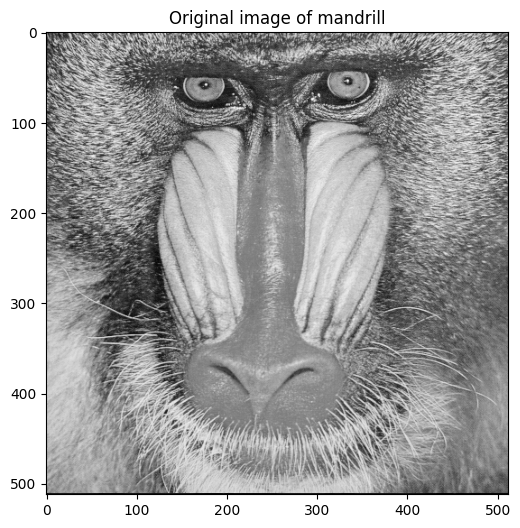

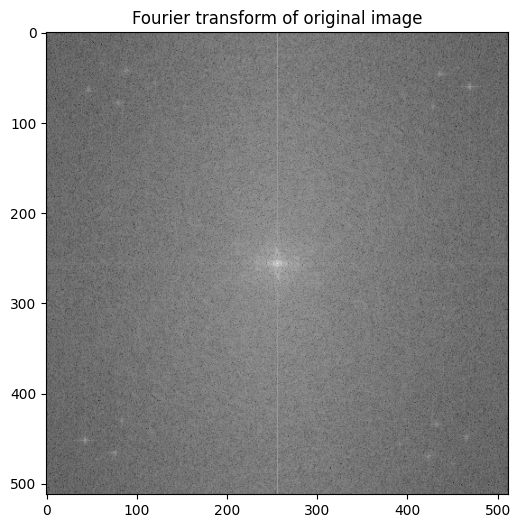

In [3]:
mandrill = np.array(Image.open("img/mandrill.png"))
FT = toVisualizeLogFT(computeFT(mandrill))
imshow(mandrill, title="Original image of mandrill")
imshow(FT, title="Fourier transform of original image")

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [4]:
def idealLowPassFilter(n,m,fc):
    H = np.zeros((n,m))

    center_i = n//2
    center_j = m//2
    
    for i in range(n):
        for j in range(m):
            distance = np.sqrt((i-center_i)**2 + (j-center_j)**2)

            if (distance <= fc):
                H[i][j]=1
    return H

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [5]:
def lowPass(I, fc):
    FT = computeFT(I)
    FTT = centeredFT(FT)
    
    n = FTT.shape[0]
    m = FTT.shape[1]
    H = idealLowPassFilter(n,m,fc)

    for i in range(n):
        for j in range(m):
            FTT[i][j] = FTT[i][j]*H[i][j]

    IFFT = ifftshift(FTT)
    IFT = ifft2(IFFT)
    IFT = np.float64(IFT)
    return IFT

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


/var/folders/gm/blpfd8fn2ksd_tq8lvr6n6940000gn/T/ipykernel_94562/124323000.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  IFT = np.float64(IFT)


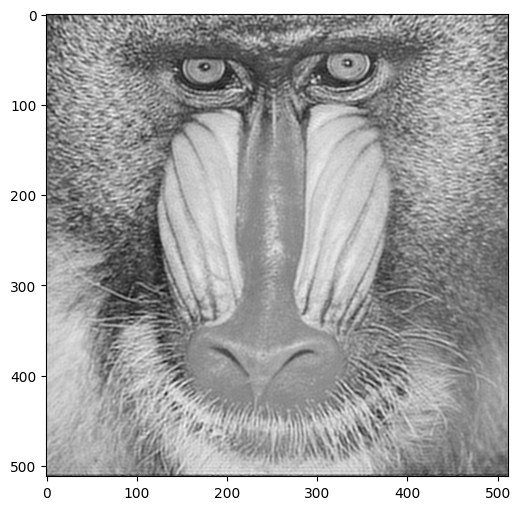

In [6]:
mandrill_1 = lowPass(mandrill,128 )
imshow(mandrill_1, title="")


## Exercise 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

$\frac{d-1}{2}$

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [5]:
def imagePad(I,h):
    d = h.shape[0]
    x = int((d-1)/2)
    n = I.shape[0]
    m = I.shape[1]
    newI = np.zeros((n+d-1,m+d-1))

    for i in range(n):
        for j in range(m):
            newI[i+x][j+x] = I[i][j]
    return newI

I = np.array ([[1,2],[4,5],[7,8]])
print(I.shape)
h = np.array([[1,1,1],[1,1,1],[1,1,1]])
I=imagePad(I,h)
print(I.shape)


(3, 2)
(5, 4)


3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [9]:
def conv2(I,h):
    I = np.double(I)
    padded_I = imagePad(I,h)
    d = h.shape[0]
    padding = int((d-1)/2)
    g = h.copy()
    for i in range(d):
        for j in range(d):
            g[i][j] = h[d-i-1][d-j-1]
    
    newI = I.copy()

    n = I.shape[0]
    m = I.shape[1]

    for i1 in range(n):
        for j1 in range(m):

            sum=0
            for i2 in range(d):
                for j2 in range(d):
                    sum += padded_I[i2+i1][j2+j1] * g[i2][j2]
            newI[i1][j1] = sum 

    return newI

I = np.array ([[1,2,3],[4,5,6],[7,8,9]])
h = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
newI = conv2(I,h)
print(newI)

[[  7.   4.  -7.]
 [ 15.   6. -15.]
 [ 13.   4. -13.]]


4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

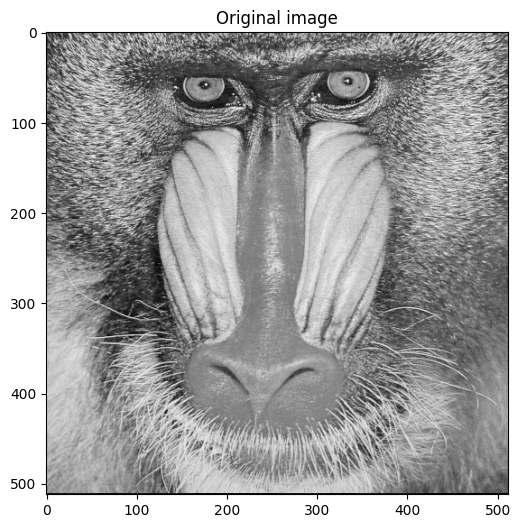

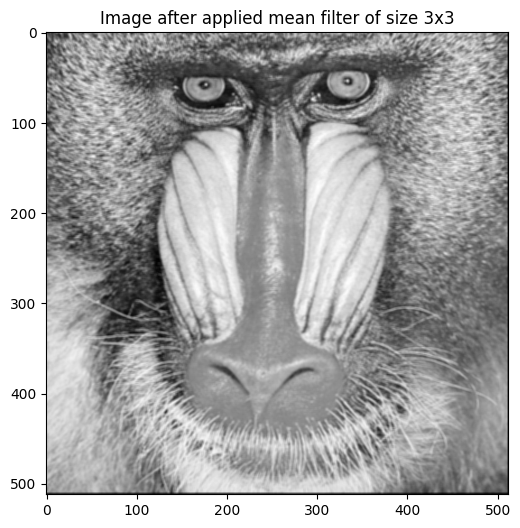

In [8]:
from scipy.signal import convolve2d

def createMeanH(d):
    h = np.ones((d,d))
    return h/(d**2)

d= 3
h = createMeanH(d)
newMandrill = convolve2d(mandrill,h, mode ="same")
imshow(mandrill, title="Original image")
title = "Image after applied mean filter of size " + str(d) + ("x") + str(d)
imshow(newMandrill, title=title)

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

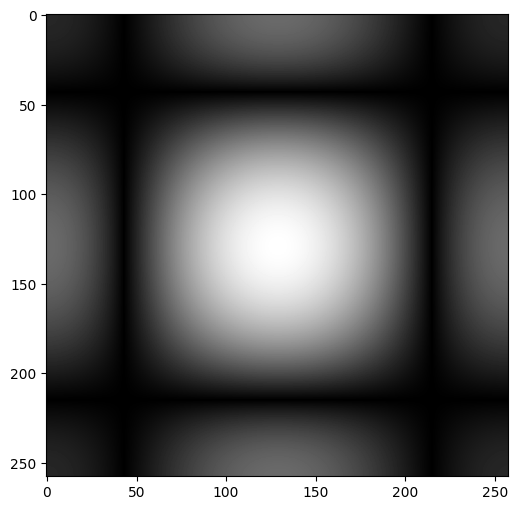

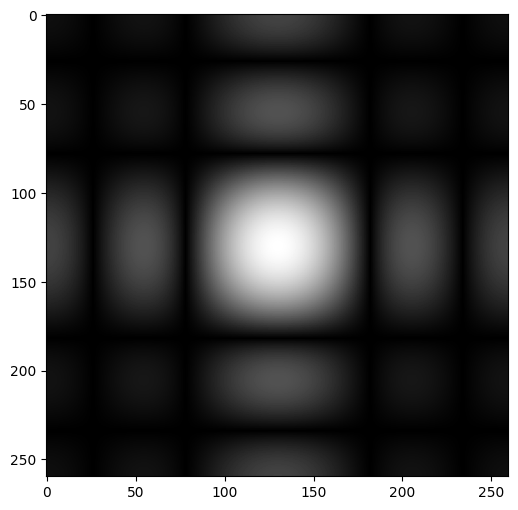

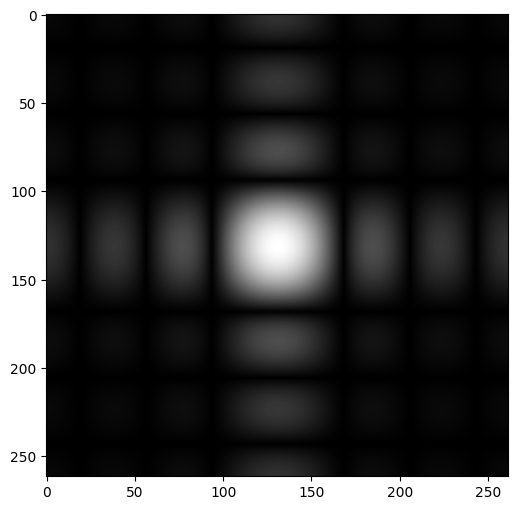

In [83]:
d=3
h = createMeanH(d)
padding = np.zeros((256,256))
h =  imagePad(h,padding)
FT = computeFT(h)
FTT = toVisualizeLogFT(FT)
imshow(FTT)

d=5
h = createMeanH(d)
padding = np.zeros((256,256))
h =  imagePad(h,padding)
FT = computeFT(h)
FTT = toVisualizeLogFT(FT)
imshow(FTT)

d=7
h = createMeanH(d)
padding = np.zeros((256,256))
h =  imagePad(h,padding)
FT = computeFT(h)
FTT = toVisualizeLogFT(FT)
imshow(FTT)

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

$H(f) = \sum_{n=0}^{N-1} h[n]e^{-j2\pi fn}$

\frac{1}{N}

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

(3, 3)


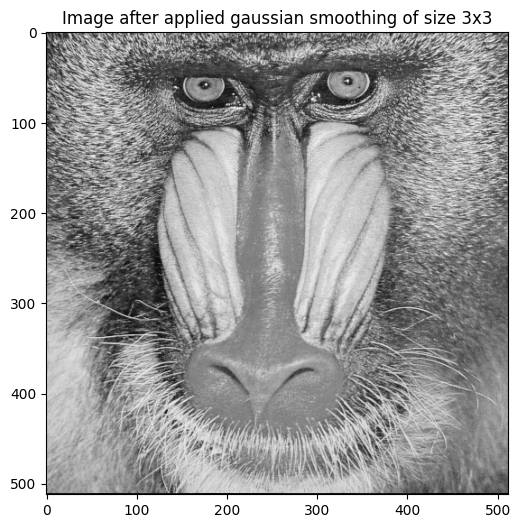

(5, 5)


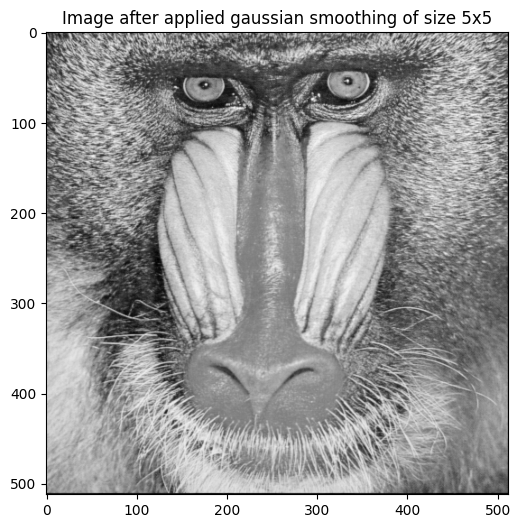

(7, 7)


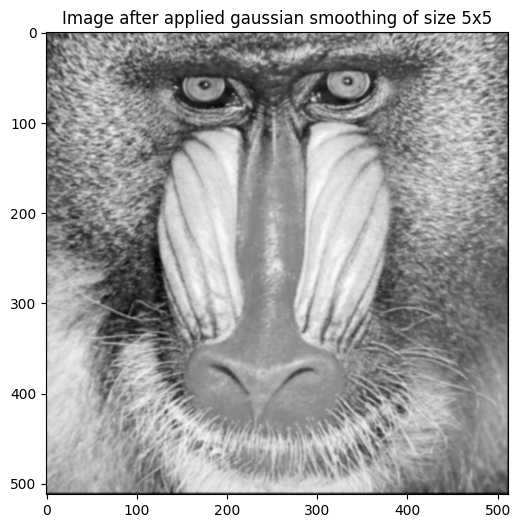

In [14]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

sigma = 1/3
h = gaussianKernel(sigma)
print(h.shape)
newMandrill = conv2(mandrill,h)
title = "Image after applied gaussian smoothing of size 3x3"
imshow(newMandrill, title=title)

sigma = 1/2
h = gaussianKernel(sigma)
print(h.shape)
newMandrill = conv2(mandrill,h)
title = "Image after applied gaussian smoothing of size 5x5"
imshow(newMandrill, title=title)

sigma = 1
h = gaussianKernel(sigma)
print(h.shape)
newMandrill = conv2(mandrill,h)
title = "Image after applied gaussian smoothing of size 7x7"
imshow(newMandrill, title=title)

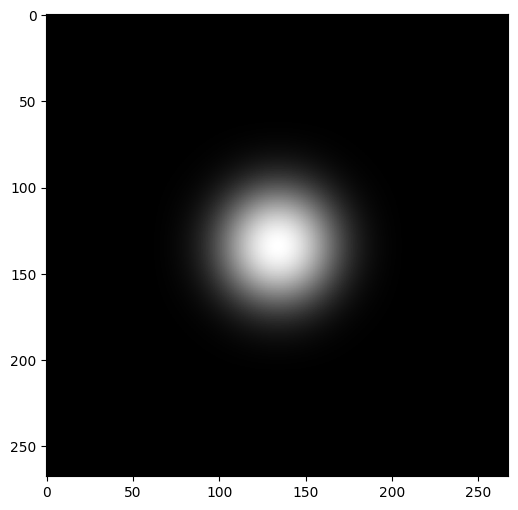

In [21]:
sigma = 2
h = gaussianKernel(sigma)
padding = np.zeros((256,256))
h =  imagePad(h,padding)
FT = computeFT(h)
FTT = toVisualizeLogFT(FT)
imshow(FTT)

## Exercise 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

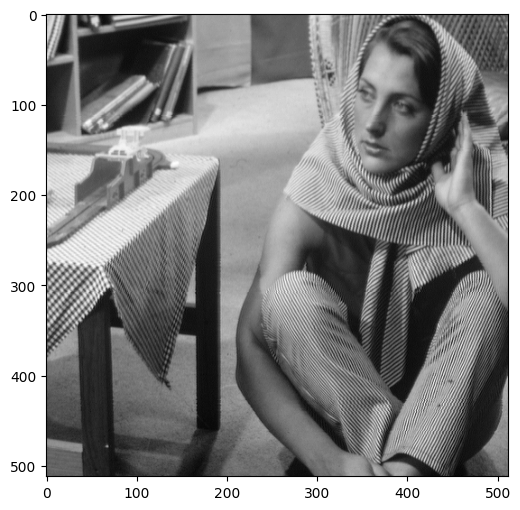

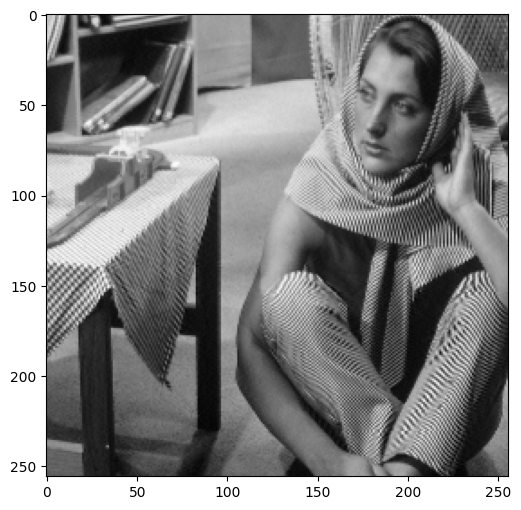

In [86]:
I = np.array(Image.open('img/barbara.png'))
def subSample2(I):
    # Sample the signal by taking every T_s element
    return I[::2,::2]
I_sub=subSample2(I)
imshow(I)
imshow(I_sub)

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

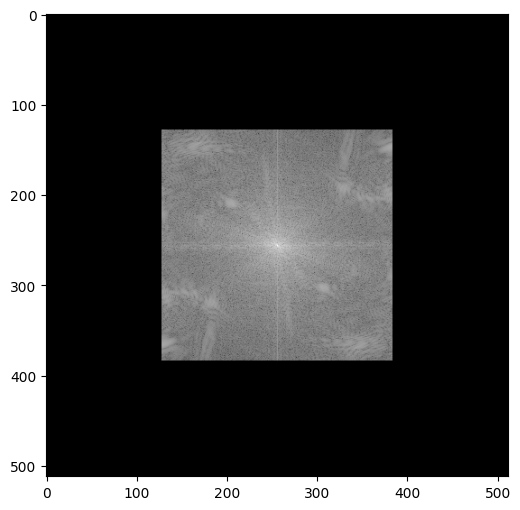

/var/folders/gm/blpfd8fn2ksd_tq8lvr6n6940000gn/T/ipykernel_46784/181351497.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  IFT = np.float64(IFT)


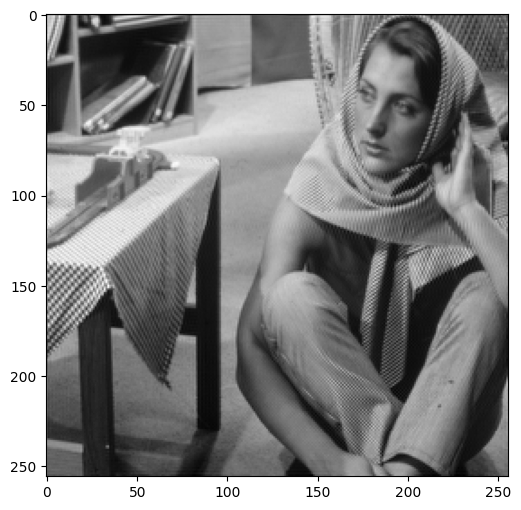

In [90]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A

### your answer start below
n = I.shape[0]
m = I.shape[1]
h = antiAliasingFilter(n,m)
FT = computeFT(I)
FTT = centeredFT(FT)

n = FTT.shape[0]
m = FTT.shape[1]

for i in range(n):
    for j in range(m):
        FTT[i][j] = FTT[i][j]*h[i][j]

IFFT = ifftshift(FTT)
IFT = ifft2(IFFT)
imshow(toVisualizeLogFT(IFFT))
IFT = np.float64(IFT)
new_Image = subSample2(IFT)
imshow(new_Image)


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

## Exercise 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images and examine their shape. What difference there are between them?

(512, 512, 3)
(512, 512)


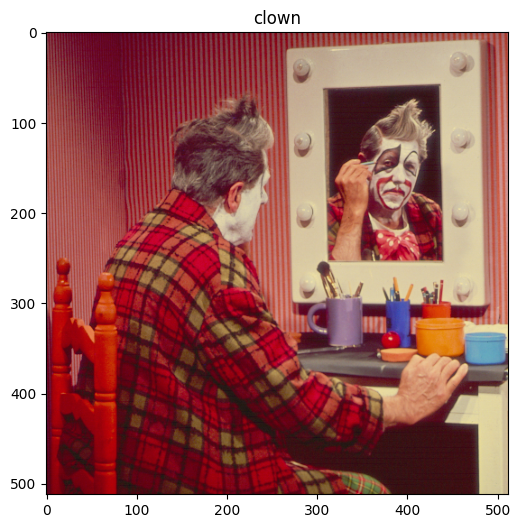

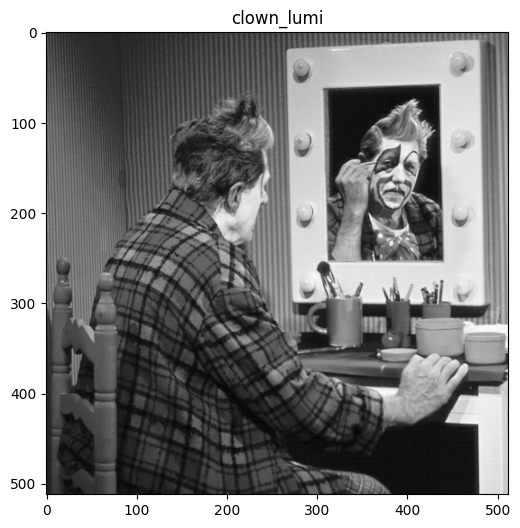

In [2]:
I1 = np.array(Image.open("img/clown.bmp"))
I2 = np.array(Image.open("img/clown_lumi.bmp"))
print(I1.shape)
print(I2.shape)
imshow(I1, title="clown")
imshow(I2, title="clown_lumi")

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

In [10]:
I1

array([[[122,  26,  40],
        [127,  65,  74],
        [124,  31,  52],
        ...,
        [166,  42,  43],
        [169,  66,  54],
        [168,  98, 102]],

       [[124,  33,  42],
        [130,  65,  77],
        [127,  39,  61],
        ...,
        [168,  50,  47],
        [167,  65,  59],
        [168,  97,  97]],

       [[126,  38,  46],
        [125,  68,  80],
        [123,  43,  59],
        ...,
        [169,  61,  33],
        [172,  66,  54],
        [169,  95,  99]],

       ...,

       [[ 87,   6,  26],
        [ 88,   5,  14],
        [ 83,   8,  31],
        ...,
        [199, 183, 149],
        [202, 184, 151],
        [204, 184, 149]],

       [[ 86,   7,  29],
        [ 86,   3,  21],
        [ 86,   7,  29],
        ...,
        [202, 185, 149],
        [202, 184, 144],
        [204, 184, 144]],

       [[ 86,   8,  32],
        [ 88,   5,  23],
        [ 89,   7,  27],
        ...,
        [202, 184, 147],
        [200, 181, 145],
        [201, 183, 143]]

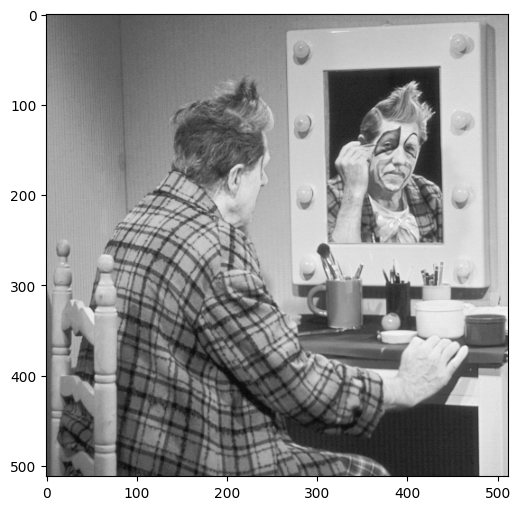

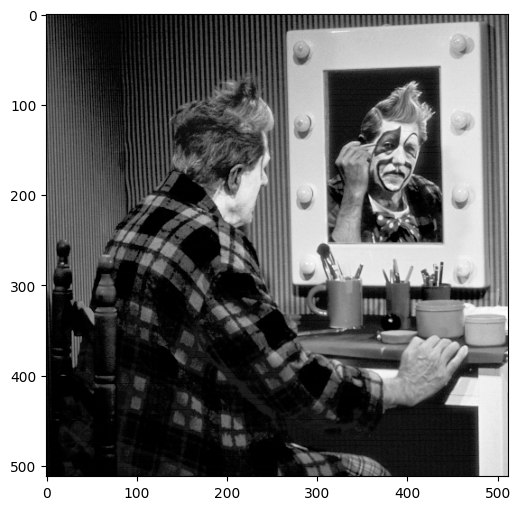

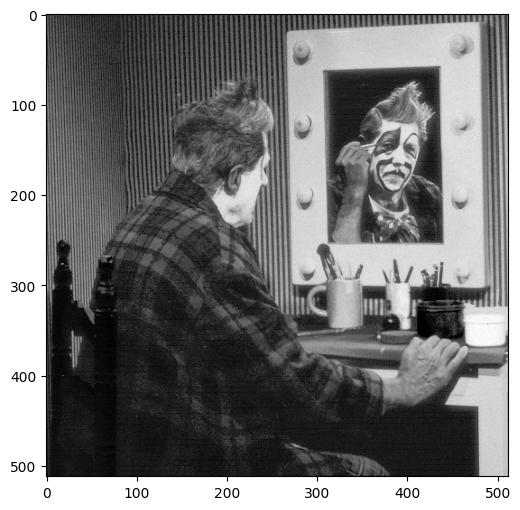

In [27]:
def extract_color_channels(image):
    # image is expected to be a 3D array with shape (H, W, 3)
    I_R = image[:, :, 0]  # Red channel
    I_G = image[:, :, 1]  # Green channel
    I_B = image[:, :, 2]  # Blue channel
    
    return I_R, I_G, I_B
I_R, I_G, I_B = extract_color_channels(I1)
imshow(I_R)
imshow(I_G)
imshow(I_B)

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

In [28]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    # compute max intensity and min intensity of I
    kmax = np.max(I)
    kmin = np.min(I)
    # reshape the array to vector and change type to float
    Ivector = np.float64(np.reshape(I,I.size).copy())
    # compute the normalize value with interval [k1,k2]
    for i in range(I.size):
        Ivector[i] = k1+(((Ivector[i]-kmin)*(k2-k1))/(kmax-kmin))
    # reshape vector to original shape of I
    K = np.reshape(Ivector, (I.shape))
    return K

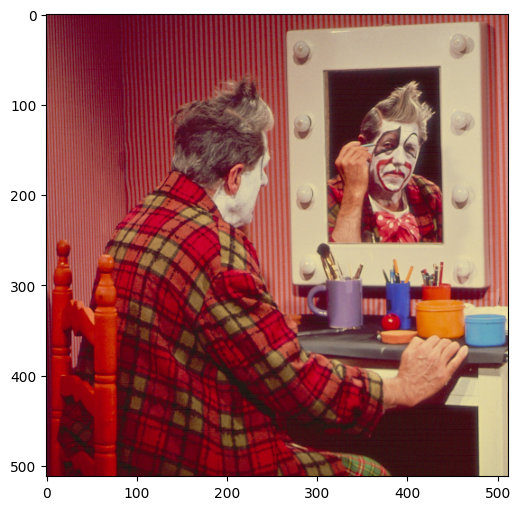

In [35]:
I3= I1.copy()

I3[:,:,0] = I_R
I3[:,:,1] = I_G
I3[:,:,2] = I_B
I3_normalized = normalizeImage(I3,0,1)
imshow(I3)

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

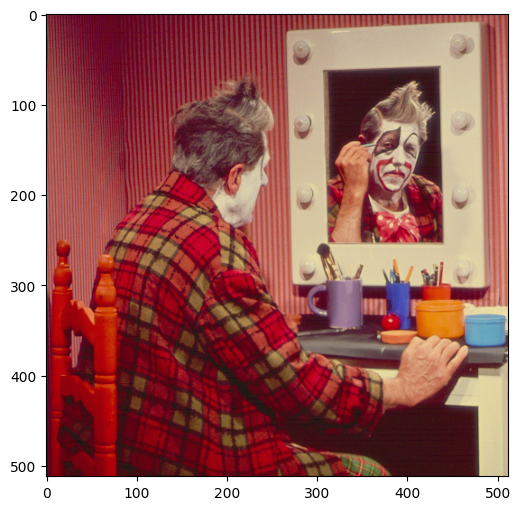

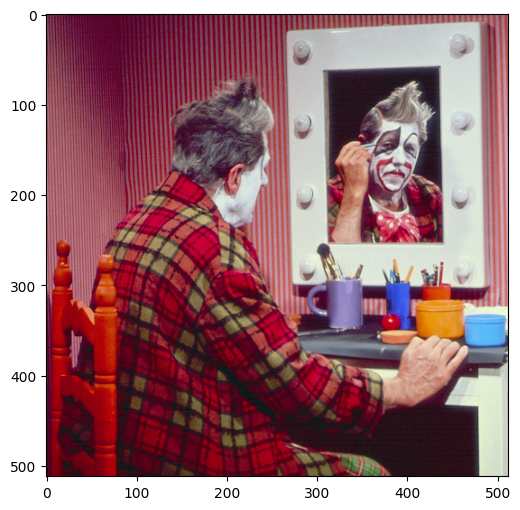

In [111]:
IR_normalized = normalizeImage(I_R,0,255)
IG_normalized = normalizeImage(I_G,0,255)
IB_normalized = normalizeImage(I_B,0,255)
I4= I1.copy()

I4[:,:,0] = IR_normalized
I4[:,:,1] = IG_normalized
I4[:,:,2] = IB_normalized
imshow(I1)
imshow(I4)